In [1]:
# import packages
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ODEs
def SIR(y, t, beta, gamma):
    S, I, R = y

    dS_dt = -beta*S*I
    dI_dt = beta*S*I - gamma*I
    dR_dt = gamma*I

    return([dS_dt, dI_dt, dR_dt])

In [3]:
def SEIR(y, t, beta, gamma1, gamma2, alpha1, alpha2):
    S, E, I, R = y

    dS_dt = -beta*S*I*r/N + alpha2*R
    dE_dt = beta*S*I*r/N - gamma1*E - alpha1*E - d1*E
    dI_dt = alpha1*E - gamma2*I - d2*I
    dR_dt = gamma1*E + gamma2*I - alpha2*R

    return([dS_dt, dE_dt, dI_dt, dR_dt])

In [4]:
# initial conditions
N = 10000
r = 100
E0 = 100
I0 = 1
S0 = N-E0-I0
R0 = 0
beta = .03
gamma1 = .05
gamma2 = .2
alpha1 = .1
alpha2 = .001
d1 = 0.03
d2 = 0.03

# time vector
period = 1
t = np.linspace(0, 100*period, 10000*period)

# result
re = scipy.integrate.odeint(SEIR,[S0,E0,I0,R0],t,args=(beta,gamma1,gamma2,alpha1,alpha2))
re = np.array(re)
re

array([[9.89900000e+03, 1.00000000e+02, 1.00000000e+00, 0.00000000e+00],
       [9.89896885e+03, 9.98512653e+01, 1.09752293e+00, 5.20652225e-02],
       [9.89893481e+03, 9.97056864e+01, 1.19467476e+00, 1.04251025e-01],
       ...,
       [4.67693243e+02, 1.57990584e-01, 1.11207285e-01, 7.11459064e+03],
       [4.67764239e+02, 1.57862279e-01, 1.11109537e-01, 7.11451979e+03],
       [4.67835235e+02, 1.57734092e-01, 1.11011886e-01, 7.11444893e+03]])

In [5]:
death = [N-sum(re[i,:]) for i in range(len(re))]

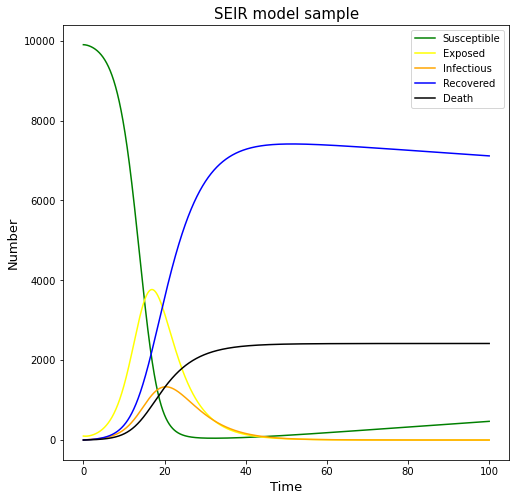

In [6]:
# plot result
plt.figure(figsize=[8,8])
plt.plot(t, re[:,0],label = 'Susceptible',color = 'green')
plt.plot(t, re[:,1],label = 'Exposed',color = 'yellow')
plt.plot(t, re[:,2],label = 'Infectious',color = 'orange')
plt.plot(t, re[:,3],label = 'Recovered',color = 'b')
plt.plot(t, death,label = 'Death',color = 'black')
plt.title("SEIR model sample", size=15)
plt.xlabel("Time", size=13)
plt.ylabel("Number", size=13)
plt.legend()
#plt.savefig('../graphs/SEIR model sample')
plt.show()